The dataset is based on the data of the Bank Customer Churn.
And I found three potential of the dataset:(1)Many of the balance of the customer are zero;(2)The customer complaint rate is relatively high;(3)Customer satisfaction is relatively low.
The number of observations are 15.The data show seventeen variables, each describing the information of the customers in bank.
The variables includes categorical and quanitative variables.


In [24]:
#import the dataset
import pandas as pd

data = pd.read_csv("7030.csv")
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

Calculate and present the numerical descriptive statistics of 'Balance','Complain' and 'Satisfaction Score' in data set.

In [25]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd

data = pd.read_csv("7030.csv")
print(data['Complain'])

import statistics
mean=(statistics.mean(data['Complain']))
print("Mean:", mean)
variance=(statistics.variance(data['Complain']))
print("Variance:", variance)
std_deviation=(statistics.stdev(data['Complain']))
print("Standard Deviation:", std_deviation)
median=(statistics.median(data['Complain']))
print("Median:",median)
mode=(statistics.mode(data['Complain']))
print("Mode=",mode)
quantiles=(statistics.quantiles(data['Complain']))
print("quantiles",quantiles)
coefficient_of_variation = std_deviation / mean
print("Coefficient of Variation:", coefficient_of_variation)
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")

0       1
1       1
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Complain, Length: 10000, dtype: int64
Mean: 0.2044
Variance: 0.16263690369036904
Standard Deviation: 0.40328265979380895
Median: 0.0
Mode= 0
quantiles [0.0, 0.0, 0.0]
Coefficient of Variation: 1.9730071418483803
Coefficient of Variation: 1.97%


In [27]:
import pandas as pd

data = pd.read_csv("7030.csv")
print(data['Balance'])

import statistics
mean2=(statistics.mean(data['Balance']))
print("Mean:", mean2)
variance2=(statistics.variance(data['Balance']))
print("Variance:", variance2)
std_deviation2=(statistics.stdev(data['Balance']))
print("Standard Deviation:", std_deviation2)
median2=(statistics.median(data['Balance']))
print("Median:",median2)
mode2=(statistics.mode(data['Balance']))
print("Mode=",mode2)
quantiles2=(statistics.quantiles(data['Balance']))
print("quantiles=",quantiles2)
coefficient_of_variation2= std_deviation2 / mean2
print("Coefficient of Variation:", coefficient_of_variation2)
print(f"Coefficient of Variation: {coefficient_of_variation3:.2f}%")


0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64
Mean: 76485.889288
Variance: 3893436175.990742
Standard Deviation: 62397.405202385955
Median: 97198.54000000001
Mode= 0.0
quantiles= [0.0, 97198.54000000001, 127647.84]
Coefficient of Variation: 0.8158028334799735
Coefficient of Variation: 0.47%


In [28]:
import pandas as pd

data = pd.read_csv("7030.csv")
print(data['Satisfaction Score'])

import statistics
mean3=(statistics.mean(data['Satisfaction Score']))
print("Mean:", mean3)
variance3=(statistics.variance(data['Satisfaction Score']))
print("Variance:", variance3)
std_deviation3=(statistics.stdev(data['Satisfaction Score']))
print("Standard Deviation:", std_deviation3)
median3=(statistics.median(data['Satisfaction Score']))
print("Median:",median3)
mode3=(statistics.mode(data['Satisfaction Score']))
print("Mode=",mode3)
quantiles3=(statistics.quantiles(data['Satisfaction Score']))
print("quantiles=",quantiles3)
coefficient_of_variation3= std_deviation3 / mean3
print("Coefficient of Variation:", coefficient_of_variation3)
print(f"Coefficient of Variation: {coefficient_of_variation3:.2f}%")


0       2
1       3
2       3
3       5
4       5
       ..
9995    1
9996    5
9997    3
9998    2
9999    3
Name: Satisfaction Score, Length: 10000, dtype: int64
Mean: 3.0138
Variance: 1.9766072207220722
Standard Deviation: 1.4059186394390226
Median: 3.0
Mode= 3
quantiles= [2.0, 3.0, 4.0]
Coefficient of Variation: 0.46649367557204285
Coefficient of Variation: 0.47%


Simulation of sampling distribution of sample mean

<Axes: ylabel='Frequency'>

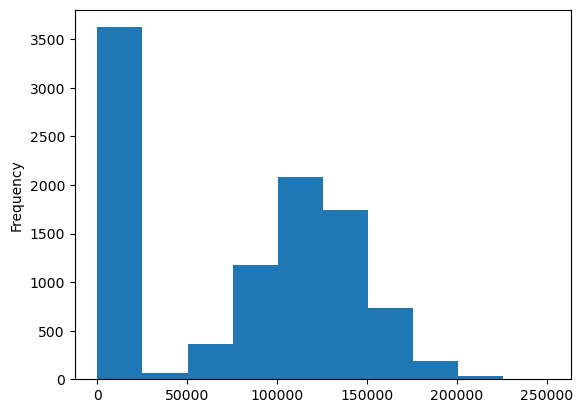

In [29]:
sample_means_series = pd.Series(data['Balance'])
sample_means_series.plot(kind = 'hist')

The plot shows that the rest of the balances are close to a normal distribution with the exception of zero.

Conclusion：1.Incentivize customers with zero balances to save money；2.Motivate customers who don't complain to give a higher satisfaction;3.Reduce the complaint rate.

Hypothesis Testing
using Chi-squared test for independence


1.By adopting the Chi-squared test, we are able to decide whether two **categorical** variables of a population are independent.    
$H_0: \text{gender and Card Type are independent}$ $\quad$ vs $\quad$
$H_1:\text{gender and Card Type are not independent}$

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats     

order =pd.read_csv("7030.csv")

from scipy.stats import chi2_contingency

# Summarize the count in a contingency table
contingency_table_col = pd.crosstab(order['Gender'], order['Card Type'], normalize='columns')
print("column percentage", contingency_table_col)

contingency_table= pd.crosstab(order['Gender'], order['Card Type'])
print("contingency_table", contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")

column percentage Card Type   DIAMOND     GOLD  PLATINUM    SILVER
Gender                                          
Female     0.463901  0.42446  0.465731  0.463141
Male       0.536099  0.57554  0.534269  0.536859
contingency_table Card Type  DIAMOND  GOLD  PLATINUM  SILVER
Gender                                    
Female        1163  1062      1162    1156
Male          1344  1440      1333    1340
Chi2 Statistic: 12.0205, p-value: 0.0073


Given that p-value is less than 0.05, we reject the null hypothesis and claimed that the association between gender and card type is significantly different from 0.   

2.By adopting the Chi-squared test, we are able to decide whether two **categorical** variables of a population are independent.    
$H_0: \text{Complain and Satisfaction Score are independent}$ $\quad$ vs $\quad$
$H_1:\text{Complain and Satisfaction Score are not independent}$

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats     

order =pd.read_csv("7030.csv")

from scipy.stats import chi2_contingency

# Summarize the count in a contingency table
contingency_table_col = pd.crosstab(order['Complain'], order['Satisfaction Score'], normalize='columns')
print("column percentage", contingency_table_col)

contingency_table= pd.crosstab(order['Complain'], order['Satisfaction Score'])
print("contingency_table", contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")

column percentage Satisfaction Score         1         2         3         4         5
Complain                                                            
0                   0.799689  0.782522  0.801175  0.794323  0.800399
1                   0.200311  0.217478  0.198825  0.205677  0.199601
contingency_table Satisfaction Score     1     2     3     4     5
Complain                                        
0                   1545  1576  1636  1595  1604
1                    387   438   406   413   400
Chi2 Statistic: 3.0111, p-value: 0.5560


Given that p-value is more than 0.05, we fail to reject the null hypothesis and claimed that the association between Complain and Satisfaction Score is not significantly different from 0.   

I didn't use AI as a u-assist for this project. When using AI to help me learn, I think the biggest challenge is that it doesn't give me perfect answers and wastes my time, so I rely less on AI.But I think that using AI to assist my learning can better help me get in touch with the most up-to-date learning methods, and it can also help me think better about my learning tasks. And in some ways lighten my load.In some assignments, the formulas displayed by AI are not learned in textbooks, and may be different, so you need to be cautious when using AI for learning.In terms of programming, AI can be used to assist us in completing some basic theoretical learning, although I have not used it, but I think it should benefit a lot.. Here are my general opportunities and challenges I have faced when using it to assist my studies.

I referred to teacher's teaching notebook during my analysis.
